# Лекция 1

## Метод КАБАРЕ для уравнений и систем гиперболического типа.  
## Часть 6

<a id = "s_sec20"></a>
### 20. Линейное уравнение переноса. 

Ранее мы уже рассматривали подходы для решения простейшего одномерного линейного уравнение переноса:

\begin{equation}
u_t = - a \cdot u_x
\label{eq:linear_wave_eq}
\end{equation}

В числе прочих разностных схем для решения уравнения \eqref{eq:linear_wave_eq} в части 1.3 мы реализовывали схему КАБАРЕ, а в части 1.4 анализировали свойства этой схемы. В частности было показано, что схема КАБАРЕ обладает вторым порядком точности, бездиссипативна и имеет два канала высокой точности при числах Куранта-Фридрихса-Леви $C = 0.5$ и $C = 1.0$. Схема является условно устойчивой, с необходимым условием устойчивости $C<1$. Данные свойства выделяют эту схему среди других рассмотренных нами. В связи с этим, мы будем более детально прорабатывать различные аспекты использования схемы КАБАРЕ, как для отдельных уравнений гиперболического типа так и для систем, в том числе уравнений газовой динамики.  

Трехслойная схема 

\begin{equation}
\frac{1}{2}\left(\frac{u^{n+1}_i - u^n_i}{\Delta t} + \frac{u^{n}_{i-1} - u^{n-1}_{i-1}}{\Delta t} \right) = - a \frac{u^n_{i} - u^n_{i-1}}{\Delta x}
\label{eq:cabaret}
\end{equation}

впервые была рассмотрена А. Айзерлисом [[1]](#foot1), и первоначально имела название upwind leapfrog. Параллельно, В.М. Головизниным и А.А. Самарским была получена схема с аналогичным шаблоном, которую авторы назвали схемой КАБАРЕ [[2]](#foot2). В работах В.М. Головизнина и А.А. Самарского схема приводится в трехэтапной форме, которая будет иметь большое значение для дальнейшего применения схемы КАБАРЕ. Для получения трехэтапной формы, определим на сетке два типа переменных: "потоковые" переменные $u^n_{i\pm1/2}$, определенные на границах пространственных ячеек, и "консервативные" переменные $U^n_i$, определенные в центрах пространственных ячеек. Аппроксимируем уравнение \eqref{eq:linear_wave_eq} простейшей разностной схемой:

\begin{equation}
\frac{U^{n+1}_i - U^n_i}{\Delta t} + \frac{a}{2} \left(\frac{u^{n+1}_{i+1/2} - u^{n+1}_{i-1/2}}{\Delta x} + \frac{u^{n}_{i+1/2} - u^{n}_{i-1/2}}{\Delta x} \right) = 0
\label{eq:cabaret_2}
\end{equation}

Данная схема обладает вторым порядком аппроксимации по времени и пространству и определена на минимально возможном пространственно-временном шаблоне. Однако, она не замкнута - в ней отсутствует связь между пространственными и консервативными переменными. 

Недостающее замыкание осуществляется следующим образом. Вначале по явной схеме первого порядка точности вычисляется значение консервативной переменной $U^{n+1/2}_i$ на промежуточном временном слое $t^{n+1/2}$:

\begin{equation}
\frac{U^{n+1/2}_i - U^n_i}{\Delta t /2} + \frac{a}{2} \left(\frac{u^{n}_{i+1/2} - u^{n}_{i-1/2}}{\Delta x} \right) = 0
\label{eq:cabaret_step1}
\end{equation}

Далее определяем неизвестные значение потоковых переменных на новом временном слое по формуле линейной экстраполяции:

\begin{equation}
u^{n+1}_{i+1/2} = 2U^{n+1/2}_{i} - u^{n}_{i-1/2}
\label{eq:cabaret_step2}
\end{equation}

Сеточные соотношения \eqref{eq:cabaret_2}, \eqref{eq:cabaret_step1}, \eqref{eq:cabaret_step2} представляют собой замкнутую систему, которая и получила название схемы КАБАРЕ в работах В.М. Головизнина и А.А. Самарского. Также схему можно записать в более симметричном виде типа предиктор-корректор:

\begin{equation}
\frac{U^{n+1/2}_i - U^n_i}{\Delta t /2} + \frac{a}{2} \left(\frac{u^{n}_{i+1/2} - u^{n}_{i-1/2}}{\Delta x} \right) = 0
\end{equation}

\begin{equation}
u^{n+1}_{i+1/2} = 2U^{n+1/2}_{i} - u^{n}_{i-1/2}
\end{equation}

\begin{equation}
\frac{U^{n+1}_i - U^{n+1/2}_i}{\Delta t /2} + \frac{a}{2} \left(\frac{u^{n+1}_{i+1/2} - u^{n+1}_{i-1/2}}{\Delta x} \right) = 0
\end{equation}

Схема upwind leapfrog получается из схемы КАБАРЕ путем исключения консервативных переменных. 

Проведя анализ схемы КАБАРЕ можно показать, что она является консервативной, т.е. для неё выполняется дискретный аналог законов сохранения на расчетной сетке. Схема представима в виде

\begin{equation}
\Delta x \left( \frac{\langle u \rangle^{n+1/2}_i - \langle u \rangle^{n-1/2}_i}{\Delta t} \right) + \mathrm{Flux}(a \cdot u)^n_{i+1/2} - \mathrm{Flux}(a \cdot u)^n_{i-1/2} = 0
\label{eq:cons_cabaret}
\end{equation}
    
где 

\begin{equation*}    
\langle u \rangle^{n+1/2}_i = U^{n+1/2}_i = \frac{1}{2}\left(u^{n+1}_{i+1/2} + u^{n}_{i}\right) \\
\mathrm{Flux}(a \cdot u)^n_{i+1/2} =a \cdot u^n_{i+1/2}
\end{equation*}

Откуда можно заключить, что схема является консервативной. Интересно что для схемы КАБАРЕ, имеет место также разностный аналог дополнительного закона сохранения квадрата скалярного поля $u^2(x,t)$. 

<a id = "foot1"></a> <sub>[1]: Iserles A. // IMA Journal of Numerical Analysis. 1986, 6(4): 381–392.<a href="https://academic.oup.com/imajna/article-abstract/6/4/381/732207?redirectedFrom=fulltext">[doi.org/10.1093/imanum/6.4.381]</a> </sub>

<a id = "foot2"></a> <sub>[2]: Головизнин В.М., Самарский А.А. // 
Матем. моделирование, 1998, 10(1), 101–116.<a href="http://www.mathnet.ru/php/archive.phtml?wshow=paper&jrnid=mm&paperid=1242&option_lang=rus">[mathnet.ru]</a> </sub>



<a id = "s_sec21"></a>
### 21. Управление диссипативными и дисперсионными свойствами схемы КАБАРЕ. 

В схему КАБАРЕ можно ввести настроечный параметр $\eta$, регулирующий свойства схемы:


\begin{equation}
\frac{U^{n+1/2}_i - U^n_i}{\Delta t /2} + \frac{a}{2} \left(\frac{u^{n}_{i+1/2} - u^{n}_{i-1/2}}{\Delta x} \right) = 0
\end{equation}

\begin{equation}
u^{n+1}_{i+1/2} = \frac{2U^{n+1/2}_{i} - (1-\eta) u^{n}_{i-1/2}}{1+\eta}
\end{equation}

\begin{equation}
\frac{U^{n+1}_i - U^{n+1/2}_i}{\Delta t /2} + \frac{a}{2} \left(\frac{u^{n+1}_{i+1/2} - u^{n+1}_{i-1/2}}{\Delta x} \right) = 0
\end{equation}

При $\eta = 0$ схема бездиссипативна, при $\eta = 1$ она переходит в схему уголок, обладающую высокой диссипацией. При этом значение $\eta$ может быть сколь угодно высоким, диссипативные свойства схемы при этом увеличиваются, а область устойчивости не уменьшается. 

<a id = "s_sec22"></a>
### 22. Нелинейная коррекция схемы КАБАРЕ. 

Так как схема КАБАРЕ обладает вторым порядком точности, она, в силу теоремы Годунова, не является монотонной и приводит к появлению дополнительных максимумов и минимумов при переносе решений с большими градиентами. Эффективным способом регуляризации схемы является введение процедуры нелинейной коррекции потоковых переменных на основе принципа максимума. 
Согласно принципу максимума, значение потоковой переменной $u^{n+1}_{i+1/2}$ при числе Куранта меньшем единицы не должно быть больше максимального значения

\begin{equation}
\max(u)^n_{i} = \max_{x \in [x_{i-1/2},x_{i+1/2}]}\left[ u(x,t^n) \right] \approx \max(u^n_{i-1/2}, U^n_{i}, u^n_{i+1/2})
\label{eq:max_principle}
\end{equation}

и меньше минимального значения 

\begin{equation}
\min(u)^n_{i} = \min_{x \in [x_{i-1/2},x_{i+1/2}]}\left[ u(x,t^n) \right] \approx \min(u^n_{i-1/2}, U^n_{i}, u^n_{i+1/2})
\label{eq:min_principle}
\end{equation}

Нелинейная коррекция состоит в том, что вычисленное по формуле линейной экстраполяции значение потоковой переменной корректируется по правилу:

\begin{equation}
u^{n+1}_{i+1/2} = \begin{cases} u^{n+1}_{i+1/2}, & \mbox{если } [\max(u)^{n}_{i} \ge u^{n+1}_{i+1/2} \ge  \min(u)^{n}_{i}] \\ \min(u)^{n}_{i}, & \mbox{если } u^{n+1}_{i+1/2} < \min(u)^{n}_{i} \\ \max(u)^{n}_{i}, & \mbox{если } u^{n+1}_{i+1/2} >  \max(u)^{n}_{i} \end{cases}
\label{eq:correction}
\end{equation}

Нелинейная коррекция модифицирует только потоковые переменные, и не приводит к нарушению законов сохранения. Консервативные переменные остаются неизменными и для них свойство монотонности может не выполняться. В работе Остапенко показывается, что для чисел Куранта меньше 0.5 принцип максимума выполняется и для консервативных переменных, однако и при $C>0.5$ немонотонность консервативных переменных проявляется в сравнительно редких случаях.

Алгоритм нелинейной коррекции потоков не содержит каких-либо настроечных параметров. Учитывая, что максимумы и минимумы вычисляются с некоторой погрешностью, можно ввести настроечный параметр $\alpha$ регулирующий область допустимых пределов изменения $\Delta^n_{i} = \max(u)^{n+1}_{i} - \min(u)^{n+1}_{i}$:

\begin{equation}
u^{n+1}_{i+1/2} = \begin{cases} u^{n+1}_{i+1/2}, & \mbox{если } [\max(u)^{n}_{i} + \alpha \Delta^n_{i} \ge u^{n+1}_{i+1/2} \ge  \min(u)^{n}_{i} - \alpha \Delta^n_{i}] \\ \min(u)^{n}_{i}, & \mbox{если } u^{n+1}_{i+1/2} < \min(u)^{n}_{i} - \alpha \Delta^n_{i} \\ \max(u)^{n}_{i}, & \mbox{если } u^{n+1}_{i+1/2} >  \max(u)^{n}_{i} + \alpha \Delta^n_{i} \end{cases}
\label{eq:gen_correction}
\end{equation}

При $\alpha > 0$ происходит сужение области допустимых значений, что приводит к дополнительной диссипации. Как правило, для большинства задач допустимо использовать значения в пределах $0 < \alpha < 0.01$.  


In [1]:
import numpy as np

L = 20        # длина расчетной области
N = 1000       # число ячеек по оси x
M = 1001       # число временных шагов

delta_x = L/N              # размер пространственного шага сетки dx

x_cent = np.linspace(delta_x/2,L-delta_x/2,N)   # массив координат узлов расчетной сетки (на 1 больше, чем ячеек)
x_bound = np.linspace(0,L,N+1)   # массив координат узлов расчетной сетки (на 1 больше, чем ячеек)

U = np.zeros(N)          # массив консервативных значений u_n в узлах сетки
U_next = np.zeros(N)     # массив консервативных значений u_n в узлах сетки

u_f = np.zeros(N+1)          # массив потоковых значений u_n в узлах сетки
u_f_next = np.zeros(N+1)     # массив потоковых значений u_n в узлах сетки

def left_BC(t):            # процедура постановки ГУ на левой границе psi(t) = 0
    return(1.0)

def right_BC(t):           # процедура постановки ГУ на правой границе xi(t) = 0
    return(1.0)


In [2]:
def exact_solution(x,t,a):
#    sol = np.exp(-(x-3.0 - a*t)**2/(0.25)) + np.exp(-(x-4.0-a*t)**2/(0.25)) + 1.0 #+ np.exp(-(x-2.0-a*t)**2/(0.25)) 
    sol = np.zeros(len(x)) + 1
    for i in range(len(x)-1):
        if (t>=(x[i]-1)/a):
            sol[i] = 1
        if (t>(x[i]-2)/a)&(t<(x[i]-1)/a):
            sol[i] = 2
        if (t<=(x[i]-2)/a):
            sol[i] = 1
    return(sol)

In [3]:
def CABARET(lBc, rBc, u_f, u_f_next, U, U_next, C, t):
    '''
    Решение линейного уравнения переноса с использованием явной схемы КАБАРЕ диссипатором Паниковского 
    и нелинейной коррекцией потоков
    
    Параметры:
    lBc - процедура постановки ГУ на левой границе области
    rBC - процедура постановки ГУ на правой границе области
    u   - сеточное значение неизвестной функции u на временном шаге n 
    u_next   - сеточное значение неизвестной функции u на временном шаге n+1

    C   - число CFL
    t   - момент времени tn        
    '''

    diss = 0.0
    cells_number = len(U)
    #print (cells_number)
    
    # Этап 1
    for i in range(1,cells_number-1):
        if(i==1):
            u_f[i] = lBc(t)
        if(i==cells_number-2):
            u_f[i+1] = rBc(t)
    
        U_next[i] = U[i] - 0.5 * C * (u_f[i+1] - u_f[i])
        
    # Этап 2 Экстраполяция
    for i in range(cells_number-1):    
        u_f_next[i+1] = (2.0*U_next[i] - (1.0 - diss)*u_f[i])/(1.0 + diss)
        
    # Этап 3 Коррекция
    for i in range(cells_number-1):    
        max_u = max(u_f[i],U[i],u_f[i+1])
        min_u = min(u_f[i],U[i],u_f[i+1])
        
        if (u_f_next[i+1] > max_u):
            u_f_next[i+1] = max_u
        if (u_f_next[i+1] < min_u):
            u_f_next[i+1] = min_u
                
    # Этап 4
    for i in range(1,cells_number-1):
        if(i==1):
            u_f_next[i] = lBc(t)
            U_next[i-1] = lBc(t)
        if(i==cells_number-2):
            u_f_next[i+1] = rBc(t)
            U_next[i+1] = rBc(t)
    
        U_next[i] = U_next[i] - 0.5 * C * (u_f_next[i+1] - u_f_next[i])  


In [4]:
def visualize(scheme,scheme_name, x_cent, x_bound, M, delta_t, C, a):
    
    '''
    Процедура visualize выполняет итерации по времени для заданной разностной схемы
    
    scheme       - процедура реализующая схему
    scheme_name  - название схемы 
    M            - число итраций по времени
    delta_t      - шаг по времени dt
    '''

    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(figsize=(9, 6))
    ax.set_title('Схема '+scheme_name+', число CFL =' + str(C) + ' шаг по времени ' + str(delta_t), fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    ax.set_ylabel("u",rotation=0 ,fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    ax.set_xlabel("x",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    plt.xlim(-1,21)
 #   plt.tight_layout()
    
    t = 0.0
    u_f_init = exact_solution(x_bound,0.0,a)    # начальное условие u(x,0)
    u_f      = u_f_init.copy()                    # начальные значения u_n, u_{n+1}, u_{n-1} задаем такими же как u(x,0)
    u_f_next = u_f_init.copy()
    u_f_prev = u_f_init.copy()

    U_init = exact_solution(x_cent,0.0,a) 
    U      = U_init.copy()             
    U_next = U_init.copy()
    
    line1, = ax.plot(x_cent, U_init, linewidth=4, color="Green", label = 'начальное условие')
    
    for n in range(1,M):                # цикл итераций по времени
        
        scheme(left_BC, right_BC, u_f, u_f_next, U, U_next, C, t)   # расчет по схеме

        if (n%250 == 0):
            line3, = ax.plot(x_cent, U_next, linewidth=4, color = "Black", alpha=1/M*n, label = 'численное решение')
            line2, = ax.plot(x_cent, exact_solution(x_cent,t,a), linewidth=2, color = "Red", alpha=1/M*n, label = 'точное решение')
        
        u_f_prev = u_f.copy()               # запись значений u_{n} в u_{n-1}
        
        u_f = u_f_next.copy()               # запись значений u_{n+1} в u_{n}
        u_f_next = np.zeros(len(u_f))

        U = U_next.copy()               # запись значений u_{n+1} в u_{n}
        U_next = np.zeros(len(U))        
        
        t = t + delta_t                 # увеличиваем t на dt в конце итерации
        
    leg = ax.legend(handles=[line1,line2,line3], loc ="upper left", prop={'size': 12}) 

findfont: Font family ['Alegreya Sans'] not found. Falling back to DejaVu Sans.


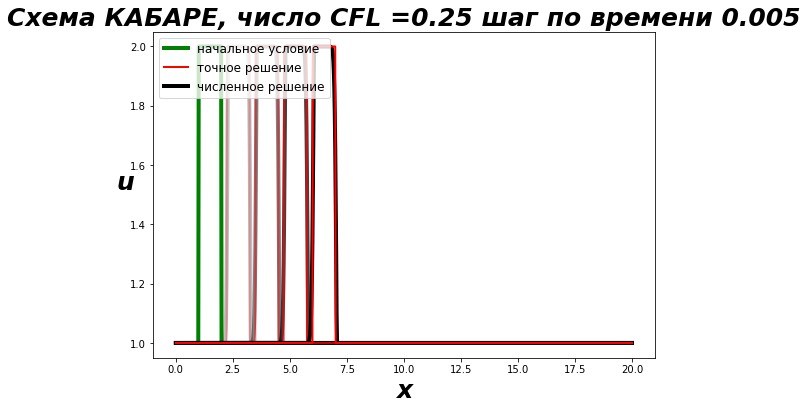

In [5]:
C = 0.25                # число CFL
a = 1.0                 # скорость распространения возмущений
delta_t = C*delta_x/a   # dt = c*dx/a

#------------------------
# Расчет по явным схемам 
#------------------------

visualize(CABARET,'КАБАРЕ', x_cent, x_bound, M, delta_t, C, a)

---

#### Задача 13
> Введите в процедуре `CABARET` настроечный параметр $\alpha$ регулирующий ширину области допустимых пределов изменения потоковой величины на этапе коррекции. Сопоставьте решения получаемые с использованием различных значений $\alpha$.

---

<a id = "s_sec23"></a>
### 23. Решение нелинейного уравнения Бюргерса методом КАБАРЕ. 

Покажем применение метода КАБАРЕ для решения нелинейных задач. В качестве примера рассмотрим уравнение Бюргерса

\begin{equation}
u_t + u \cdot u_x = \nu u_{xx}
\label{eq:burgers_eq}
\end{equation}

Алгоритм решения этого уравнения с помощью схемы КАБАРЕ состоит из четырех последовательных шагов:
1. На первом шаге вычисляются промежуточные значения переменных:

\begin{equation}
\frac{U^{n+1/2}_i - U^n_i}{\Delta t /2} = \left(\frac{F^{n}_{i+1/2} - F^{n}_{i-1/2}}{\Delta x} \right) + Q^n_{i}
\end{equation}

где $F^{n}_{i+1/2} = \frac{(u^n_{i+1/2})^2}{2}$ - функция потоков, а  $Q^n_{i}$ представляет собой вязкое слагаемое, разностный вид которого 

\begin{equation}
Q^n_{i} = \nu \frac{U^{n}_{i+1} - 2 U^{n}_i + U^{n}_{i-1}}{\Delta x^2}
\end{equation}

2. На втором шаге, в зависимости от направления скорости, вычисляются предварительные значения потоковых переменных на новом временном слое.

\begin{equation}
\widetilde u^{n+1}_{i+1/2} = \begin{cases} 2 U^{n+1/2}_i - u^{n}_{i-1/2}, & \mbox{если } 0.5 (U^{n}_i + U^{n}_{i+1}) \ge 0 \\  2U^{n+1/2}_{i+1} - u^{n}_{i+3/2}, & \mbox{если } 0.5 (U^{n}_i + U^{n}_{i+1}) < 0  \end{cases}
\label{eq:extrapolation}
\end{equation}

3. По принципу максимума осуществляется коррекция полученных потоковых переменных:

Если $0.5 (U^{n}_i + U^{n}_{i+1}) \ge 0$ то коррекция выполняется по левой от границы $i+1/2$ ячейке:

\begin{equation}
u^{n+1}_{i+1/2} = \begin{cases} \widetilde u^{n+1}_{i+1/2}, & \mbox{если } [\max(u)^{n}_{i} \ge \widetilde u^{n+1}_{i+1/2} \ge  \min(u)^{n}_{i}] \\ \min(u)^{n}_{i}, & \mbox{если } \widetilde u^{n+1}_{i+1/2} < \min(u)^{n}_{i} \\ \max(u)^{n}_{i}, & \mbox{если } \widetilde u^{n+1}_{i+1/2} >  \max(u)^{n}_{i} \end{cases}
\label{eq:correction_left}
\end{equation}

в обратном случае - по правой ячейке:

\begin{equation}
u^{n+1}_{i+1/2} = \begin{cases} \widetilde u^{n+1}_{i+1/2}, & \mbox{если } [\max(u)^{n}_{i+1} \ge \widetilde u^{n+1}_{i+1/2} \ge  \min(u)^{n}_{i+1}] \\ \min(u)^{n}_{i+1}, & \mbox{если } \widetilde u^{n+1}_{i+1/2} < \min(u)^{n}_{i+1} \\ \max(u)^{n}_{i+1}, & \mbox{если } \widetilde u^{n+1}_{i+1/2} >  \max(u)^{n}_{i+1} \end{cases}
\label{eq:correction_right}
\end{equation}

здесь $\min(u)^{n}_{i}$ и $\max(u)^{n}_{i}$ вычисляются как:

\begin{equation}
\min(u)^{n}_{i} = \min(u^n_{i-1/2}, U^n_{i}, u^n_{i+1/2}) + \Delta t Q^{n}_{i}
\label{eq:min}
\end{equation}
\begin{equation}
\max(u)^{n}_{i} = \max(u^n_{i-1/2}, U^n_{i}, u^n_{i+1/2}) + \Delta t Q^{n}_{i}
\label{eq:max}
\end{equation}

В области распада разрыва требуется иная процедура коррекции. Если консервативные скорости в соседних ячейках направлены в разные стороны $ U^n_{i} < 0$ и $ U^n_{i+1} > 0$, то новая потоковая переменная на текущем временном слое принимается равной нулю $u^{n+1}_{i+1/2} = 0$.

4. На заключительном шаге по найденным значениям потоковых и консервативных переменных вычисляются окончательные значения консервативных переменнных на новом временном слое

\begin{equation}
\frac{U^{n+1}_i - U^{n+1/2}_i}{\Delta t /2} = -\left(\frac{F^{n+1}_{i+1/2} - F^{n+1}_{i-1/2}}{\Delta x} \right) + Q^n_{i}
\end{equation}


---

#### Задача 14
> Реализуйте метод КАБАРЕ для решения нелинейного уравнения Бюргерса. Найдите решение задач Римана в форме сильного и слабого разрыва в условиях сильной конвекции ($\nu = 0.001$) и в условиях сильной диссипации ($\nu = 0.1$). 

---

In [6]:
def CABARET_Burgers(lBc, rBc, u_f, u_f_next, U, U_next, C, t):
    '''
    Решение линейного уравнения переноса с использованием явной схемы КАБАРЕ диссипатором Паниковского 
    и нелинейной коррекцией потоков
    
    Параметры:
    lBc - процедура постановки ГУ на левой границе области
    rBC - процедура постановки ГУ на правой границе области
    u   - сеточное значение неизвестной функции u на временном шаге n 
    u_next   - сеточное значение неизвестной функции u на временном шаге n+1

    C   - отношение шагов по времени и пространству
    t   - момент времени tn        
    '''

    diss = 0.0
    cells_number = len(U)
    nu = 0.0001
    
    # Этап 1
    for i in range(1,cells_number-1):
        if(i==1):
            u_f[i] = lBc(t)
        if(i==cells_number-2):
            u_f[i+1] = rBc(t)
    
        Q = nu * C * (U[i-1] - 2*U[i] + U[i+1])/delta_x
        
        
        U_next[i] = U[i] - 0.25 * C * ((u_f[i+1])**2 - (u_f[i])**2) + Q 
        
    # Этап 2 Экстраполяция
    for i in range(cells_number-1):  
        if (0.5*(U[i] + U[i+1]) >= 0):
            u_f_next[i+1] = (2.0*U_next[i] - (1.0 - diss)*u_f[i])/(1.0 + diss)
        if (0.5*(U[i] + U[i+1]) < 0):
            u_f_next[i+1] = (2.0*U_next[i+1] - (1.0 - diss)*u_f[i+2])/(1.0 + diss)            
        
    # Этап 3 Коррекция
    for i in range(cells_number-1):  
        
         
        if (0.5*(U[i] + U[i+1]) >= 0):
            Q = nu * C * (U[i-1] - 2*U[i] + U[i+1])/delta_x
            max_u = max(u_f[i],U[i],u_f[i+1]) + Q*C*delta_x
            min_u = min(u_f[i],U[i],u_f[i+1]) + Q*C*delta_x
        if (0.5*(U[i] + U[i+1]) < 0):
            Q = nu * C * (U[i] - 2*U[i+1] + U[i+2])/delta_x
            max_u = max(u_f[i+1],U[i+1],u_f[i+2]) + Q*C*delta_x
            min_u = min(u_f[i+1],U[i+1],u_f[i+2]) + Q*C*delta_x

        if (u_f_next[i+1] > max_u):
            u_f_next[i+1] = max_u
        if (u_f_next[i+1] < min_u):
            u_f_next[i+1] = min_u
                
    # Этап 4
    for i in range(1,cells_number-1):
        if(i==1):
            u_f_next[i] = lBc(t)
            U_next[i-1] = lBc(t)           
        if(i==cells_number-2):
            u_f_next[i+1] = rBc(t)
            U_next[i+1] = rBc(t)
    
    
        Q = nu * C * (U[i-1] - 2.0*U[i] + U[i+1])/delta_x
        
        U_next[i] = U_next[i] - 0.25 * C * ((u_f_next[i+1])**2 - (u_f_next[i])**2) + Q 

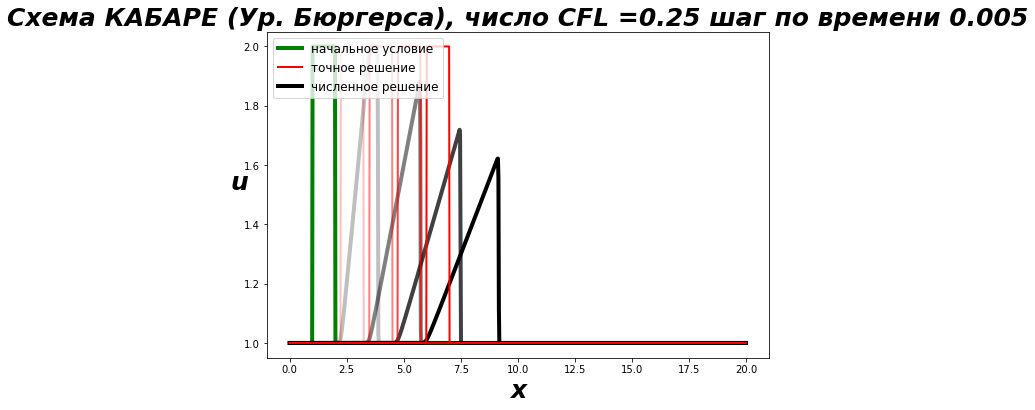

In [7]:
C = 0.25              # число CFL
a = 1.0                 # скорость распространения возмущений
delta_t = C*delta_x/a   # dt = c*dx/a
1
#------------------------
# Расчет по явным схемам 
#------------------------

visualize(CABARET_Burgers,'КАБАРЕ (Ур. Бюргерса)', x_cent, x_bound, M, delta_t, C, a)

<a id = "s_sec24"></a>
### 24. Схема КАБАРЕ для обномерных уравнений политропного газа в эйлеровых переменных.

Движение политропного газа в эйлеровых переменных описывается двумя уравнениями, представляющими собой законы сохранения массы и импульса:

\begin{equation}
\frac{\partial \rho}{\partial t} + \frac{\partial \rho u}{\partial x} = 0  
\label{eq:mass_cons}
\end{equation}

\begin{equation}
\frac{\partial \rho u}{\partial t} + \frac{\partial}{\partial x} \left( \rho u^2 + P \right) = 0  
\label{eq:momentum_cons}
\end{equation}

Замыкается данная система уравнением состояния политропного газа:

\begin{equation}
P = P(\rho) = a \cdot \rho^\gamma; \gamma >1; a>0; \rho > 0 
\label{eq:EOS}
\end{equation}

Система \eqref{eq:mass_cons},\eqref{eq:momentum_cons},\eqref{eq:EOS} является гиперболической и может быть приведена к характеристическому виду (см. Приложение 1):

\begin{equation}
\frac{\partial r}{\partial t} + \left(u + c \right) \frac{\partial r}{\partial x} = 0  
\label{eq:r_eq}
\end{equation}

\begin{equation}
\frac{\partial q}{\partial t} + \left(u - c \right) \frac{\partial q}{\partial x} = 0  
\label{eq:q_eq}
\end{equation}

Здесь $r=u+F(\rho)$, $q = u-F(\rho)$, где $F(\rho)=\int \frac{c(\rho)}{\rho} d\rho = \frac{2 \cdot \sqrt{a\gamma}}{\gamma - 1} \rho^{(\gamma-1)/2}$, а скорость звука определяется как $c(\rho) = \sqrt{\partial P)/(\partial \rho)} = \sqrt{a \gamma}\rho ^{(\gamma-1)/2}$

Одним из решений задачи о распаде произволного разрыва с начальными данными $(u_l, \rho_l, u_r, \rho_r)$  для данной системы является волна разрежения. Левая волна разрежения возникает при условии $(\rho_l > \rho_r)$ и соответствует постоянному значению правого инварианта Римана $(r = r_l = r_r = const)$. Для существования левой волны разрежения необходимо, чтобы начальные данные удовлетворяли сооношению:

\begin{equation}
u_l + F(\rho_l) = u_r + F(\rho_r)  
\label{eq:left_wave_cond}
\end{equation}

Постоянству левого инварианта Римана $(q = q_l = q_r = const)$ отвечает правая волна разрежения, существующая при условиях:

\begin{equation}
u_l - F(\rho_l) = u_r - F(\rho_r) , \rho_l < \rho_r 
\label{eq:right_wave_cond}
\end{equation}

Перепад скоростей $\Delta u$ в волнах разрежения удовлетворяет условию:

\begin{equation}
\Delta u = u_r - u_l = |F(\rho_r) - F(\rho_l)| \ge 0
\label{eq:vel_drop}
\end{equation}

Если разрыв изначально расположен в точке $x=0$, то можно записать следующее аналитическое решение задачи о распространении левой волны разрежения $(r = const)$:

\begin{equation}
\rho(x,t) = \begin{cases} \rho_l, & \mbox{если } x \le (u_l - c_l) \cdot t \\ \left[ \left( \frac{\gamma-1}{\gamma+1}\right)\frac{1}{\sqrt{a \gamma}}\left(r_l - \frac{x}{t}\right)\right]^{\frac{2}{\gamma-1}}, & \mbox{если } (u_l - c_l) \cdot t < x < (u_r - c_r) \cdot t \\ \rho_r, & \mbox{если } x \ge (u_r - c_r) \cdot t \end{cases}
\label{eq:density_solution}
\end{equation}

\begin{equation}
u(x,t) = \begin{cases} u_l, & \mbox{если } x \le (u_l - c_l) \cdot t \\ u_l + F(\rho_l) - F(\rho(x,t)), & \mbox{если } (u_l - c_l) \cdot t < x < (u_r - c_r) \cdot t \\ u_r, & \mbox{если } x \ge (u_r - c_r) \cdot t \end{cases}
\label{eq:velocity_solution}
\end{equation}

Для расчета решения уравнений \eqref{eq:mass_cons},\eqref{eq:momentum_cons},\eqref{eq:EOS} с использованием метода КАБАРЕ в балансно-характеристической форме требуются предсавления системы как в форме законов сохранения (дивергентной форме), так и в характеристическом виде. 

1. На первом этапе записывается разностный аналог дивергентной формы законов сохранения:

\begin{equation}
\frac{\Theta^{n+1/2}_{i} - \Theta^{n}_{i}}{0.5 \Delta t} + \frac{j^{n}_{i+1/2} - j^{n}_{i-1/2}}{\Delta x} = 0 
\label{eq:step_1dens}
\end{equation}

\begin{equation}
\frac{\Theta^{n+1/2}_{i} U^{n+1/2}_{i} - \Theta^{n}_{i}U^{n}_{i}}{0.5 \Delta t} + \frac{g^{n}_{i+1/2} - g^{n}_{i-1/2}}{\Delta x} = 0 
\label{eq:step_1velo}
\end{equation}

Здесь $\Theta^{n+1/2}_{i}$ - консервативное значение плотности, $U^{n+1/2}_{i}$ - консервативное значение скорости, $j^n_{i+1/2}=\rho^n_{i+1/2} u^n_{i+1/2}$ - поток массы, $g^n_{i+1/2}=\rho^n_{i+1/2} \left(u^n_{i+1/2}\right)^2 + P(\rho^n_{i+1/2})$ - поток импульса. 

Из уравнения \eqref{eq:step_1dens} находим промежуточное консервативное значение плотности $\Theta^{n+1/2}_{i}$, а затем из уравнения \eqref{eq:step_1velo} промежуточное значение скорости $U^{n+1/2}_{i}$.

2. На втором этапе, для нахождения потоковых переменных используется характеристическая форма уравнений \eqref{eq:r_eq},\eqref{eq:q_eq}. Значения Римановых инвариантов $r$ и $q$ экстраполируются в каждый узел расчетной сетки в соответствии с наклоном характеристик. 

\begin{equation}
\widetilde r^{n+1}_{i+1/2} = \begin{cases} 2 R^{n+1/2}_{i} - r^n_{i+1/2}, & \mbox{если } ^+\lambda^n_{i+1/2} \ge 0 \\ 2 R^{n+1/2}_{i+1} - r^n_{i+3/2}, & \mbox{если } ^+\lambda^n_{i+1/2} < 0 \end{cases}
\label{eq:r_extrap}
\end{equation}

\begin{equation}
\widetilde q^{n+1}_{i-1/2} = \begin{cases} 2 Q^{n+1/2}_{i} - q^n_{i-1/2}, & \mbox{если } ^-\lambda^n_{i-1/2} \ge 0 \\ 2 Q^{n+1/2}_{i-1} - q^n_{i-3/2}, & \mbox{если } ^-\lambda^n_{i-1/2} < 0 \end{cases}
\label{eq:q_extrap}
\end{equation}

Здесь $^+\lambda^n_{i+1/2} = u^n_{i+1/2} + c(\rho^n_{i+1/2})$, $^-\lambda^n_{i-1/2} = u^n_{i-1/2} - c(\rho^n_{i-1/2})$, $R^{n+1/2}_{i} = U^{n+1/2}_{i} + F(\Theta^{n+1/2}_{i})$, $Q^{n+1/2}_{i} = U^{n+1/2}_{i} - F(\Theta^{n+1/2}_{i})$.

В так называемых "звуковых" ячейках, в пределах которых течение переходит из дозвукового в сверхзвуковое требуется модификация алгоритма экстраполяции. Такие ячейки являются донорными для трех характеристик, в то время как остальные ячейки пораждают только две характеристики. Если из трех характеристик, две отвечают за перенос Риманова инварианта $q$, то значения этого инварианта по разные стороны от ячейки вычисляются по формулам:

\begin{equation}
\widetilde q^{n+1}_{i+1/2} = \left( 1 - |CFL^L_{i+1/2}|\right)q^n_{i+1/2} + \left(|CFL^L_{i+1/2}|\right)Q^{n+1/2}_{i}
\label{eq:q_extrap_transonic1}
\end{equation}

\begin{equation}
\widetilde q^{n+1}_{i-1/2} = \left( 1 - |CFL^L_{i-1/2}|\right)q^n_{i-1/2} + \left(|CFL^L_{i-1/2}|\right)Q^{n+1/2}_{i}
\label{eq:q_extrap_transonic2}
\end{equation}

\begin{equation*}
|CFL^L_{i-1/2}|=|\frac{\Delta t}{\Delta x} \left(u^n_{i-1/2} - c^n_{i-1/2}\right)|
\end{equation*}

Процедура для инварианта $r$ при этом не меняется. 

В свою очередь, если две характеристики переносят инвариант $r$, то значения этого инварианта определяются по формулам:

\begin{equation}
\widetilde r^{n+1}_{i+1/2} = \left( 1 - |CFL^R_{i+1/2}|\right)r^n_{i+1/2} + \left(|CFL^R_{i+1/2}|\right)R^{n+1/2}_{i}
\label{eq:r_extrap_transonic1}
\end{equation}

\begin{equation}
\widetilde r^{n+1}_{i-1/2} = \left( 1 - |CFL^R_{i-1/2}|\right)r^n_{i-1/2} + \left(|CFL^R_{i-1/2}|\right)R^{n+1/2}_{i}
\label{eq:r_extrap_transonic2}
\end{equation}

\begin{equation*}
|CFL^R_{i-1/2}|=|\frac{\Delta t}{\Delta x} \left(u^n_{i-1/2} + c^n_{i-1/2}\right)|
\end{equation*}

3. На третьем этапе полученные значения потоковых переменных корректируются в соответствии с принципом максимума.


\begin{equation}
r^{n+1}_{i+1/2} = \begin{cases} ^+r^n_{i+1/2}, & \mbox{если } r^{n+1}_{i+1/2} > ^+r^n_{i+1/2} \\ ^-r^n_{i+1/2}, & \mbox{если } r^{n+1}_{i+1/2} < ^-r^n_{i+1/2} \\ \widetilde r^{n+1}_{i-1/2}, & \mbox{если }  ^-r^n_{i+1/2} < r^{n+1}_{i-1/2} < ^+r^n_{i+1/2}\end{cases}
\label{eq:r_corr}
\end{equation}

\begin{equation}
^+r^n_{i+1/2} = \begin{cases} \max\left(r^n_{i+1/2}, R^{n+1/2}_{i}, r^n_{i-1/2}\right), & \mbox{если } ^+\lambda^n_{i+1/2} \ge 0 \\ \max\left(r^n_{i+1/2}, R^{n+1/2}_{i+1}, r^n_{i+3/2}\right), & \mbox{если } ^+\lambda^n_{i+1/2} < 0 \end{cases}
\label{eq:r_plus}
\end{equation}

\begin{equation}
^+r^n_{i+1/2} = \begin{cases} \min\left(r^n_{i+1/2}, R^{n+1/2}_{i}, r^n_{i-1/2}\right), & \mbox{если } ^+\lambda^n_{i+1/2} \ge 0 \\ \min\left(r^n_{i+1/2}, R^{n+1/2}_{i+1}, r^n_{i+3/2}\right), & \mbox{если } ^+\lambda^n_{i+1/2} < 0 \end{cases}
\label{eq:r_minus}
\end{equation}

\begin{equation}
q^{n+1}_{i+1/2} = \begin{cases} ^+q^n_{i+1/2}, & \mbox{если } q^{n+1}_{i+1/2} > ^+q^n_{i+1/2} \\ ^-q^n_{i+1/2}, & \mbox{если } q^{n+1}_{i+1/2} < ^-q^n_{i+1/2} \\ \widetilde q^{n+1}_{i+1/2}, & \mbox{если }  ^-q^n_{i+1/2} < q^{n+1}_{i-1/2} < ^+q^n_{i+1/2}\end{cases}
\label{eq:q_corr}
\end{equation}

\begin{equation}
^+q^n_{i+1/2} = \begin{cases} \max\left(q^n_{i+1/2}, Q^{n+1/2}_{i}, q^n_{i-1/2}\right), & \mbox{если } ^-\lambda^n_{i+1/2} \le 0 \\ \max\left(q^n_{i+1/2}, Q^{n+1/2}_{i+1}, q^n_{i+3/2}\right), & \mbox{если } ^-\lambda^n_{i+1/2} > 0 \end{cases}
\label{eq:q_plus}
\end{equation}

\begin{equation}
^+q^n_{i+1/2} = \begin{cases} \min\left(q^n_{i+1/2}, Q^{n+1/2}_{i}, q^n_{i-1/2}\right), & \mbox{если } ^-\lambda^n_{i+1/2} \le 0 \\ \min\left(q^n_{i+1/2}, Q^{n+1/2}_{i+1}, q^n_{i+3/2}\right), & \mbox{если } ^-\lambda^n_{i+1/2} > 0 \end{cases}
\label{eq:q_minus}
\end{equation}

Окончательные значения потоковых величин на новом временном слое получаем из рассчитанных значений Римановых инвариантов:

\begin{equation}
u^{n+1}_{i+1/2} = \frac{r^{n+1}_{i+1/2} + q^{n+1}_{i+1/2}}{2}
\label{eq:u_flow}
\end{equation}

\begin{equation}
\rho^{n+1}_{i+1/2} = F^{-1}\left(\frac{r^{n+1}_{i+1/2} - q^{n+1}_{i+1/2}}{2}\right)
\label{eq:rho_flow}
\end{equation}

где $F^{-1}(\xi) = \left(\frac{\gamma - 1}{2 \cdot \sqrt{a \dot \gamma}}\xi \right)^{\frac{2}{\gamma-1}}$

4. Для нахождения окончательного значение консервативных величин на временном слое возвращаемся к дивергентной форме уравнений:

\begin{equation}
\frac{\Theta^{n+1}_{i} - \Theta^{n+1/2}_{i}}{0.5 \Delta t} + \frac{j^{n+1}_{i+1/2} - j^{n+1}_{i-1/2}}{\Delta x} = 0 
\label{eq:step_4_density}
\end{equation}

\begin{equation}
\frac{\Theta^{n+1}_{i} U^{n+1}_{i} - \Theta^{n+1/2}_{i}U^{n+1/2}_{i}}{0.5 \Delta t} + \frac{g^{n+1}_{i+1/2} - g^{n+1}_{i-1/2}}{\Delta x} = 0 
\label{eq:step_4_velocity}
\end{equation}



---

#### Пример
> Реализуем метод КАБАРЕ для решения уравнений движения политропного газа. Найдите решение задачи Римана $(u_l, \rho_l, u_r, \rho_r)$ в форме правой дозвуковой волны разрежения $\rho_l < \rho_r $, сравните полученное решение с аналитическим решением \eqref{eq:density_solution},\eqref{eq:velocity_solution}.

---

In [13]:
def CABARET_Polytropic_gas(lBc, rBc, u_f, u_f_next, rho_f, rho_f_next, U, U_next, Rho, Rho_next, delta_t, delta_x, t, speed_of_sound, gamma, a, set_initials):
    '''
    Решение линейного уравнения переноса с использованием явной схемы КАБАРЕ диссипатором Паниковского 
    и нелинейной коррекцией потоков
    
    Параметры:
    lBc - процедура постановки ГУ на левой границе области
    rBC - процедура постановки ГУ на правой границе области
    u   - сеточное значение неизвестной функции u на временном шаге n 
    u_next   - сеточное значение неизвестной функции u на временном шаге n+1

    C   - отношение шагов по времени и пространству
    t   - момент времени tn        
    '''

    diss = 0.0
    cells_number = len(U)
    
    dt_dx = delta_t/delta_x
    
    # Этап 1
    for i in range(1,cells_number-1):
        if(i==1):
            u_f[i]     = u_f[i+1]
            rho_f[i]   = rho_f[i+1]
        if(i==cells_number-2):
            u_f[i+1]   = u_f[i]
            rho_f[i+1] = rho_f[i] 
            
            
        p_f_left = a*rho_f[i]**gamma
        p_f_right = a*rho_f[i+1]**gamma
        
        j_left = u_f[i]*rho_f[i]
        j_right = u_f[i+1]*rho_f[i+1]
        
        g_left = u_f[i]**2*rho_f[i]
        g_right = u_f[i+1]**2*rho_f[i+1]       
        
        
        Rho_next[i] = Rho[i] - dt_dx * (j_right - j_left) 
        U_next[i] = (U[i]*Rho[i] - dt_dx * (g_right - g_left + p_f_right - p_f_left))/Rho_next[i]
        
    # Этап 2 Экстраполяция и коррекция
    for i in range(2,cells_number-1):

        c = np.sqrt(a*gamma)*rho_f[i]**((gamma-1.0)/2.0)
        c_right = np.sqrt(a*gamma)*rho_f[i+1]**((gamma-1.0)/2.0)
        c_left = np.sqrt(a*gamma)*rho_f[i-1]**((gamma-1.0)/2.0)
        
        
        C_right = np.sqrt(a*gamma)*Rho_next[i]**((gamma-1.0)/2.0)
        C_left  = np.sqrt(a*gamma)*Rho_next[i-1]**((gamma-1.0)/2.0)

        C_2right = np.sqrt(a*gamma)*Rho_next[i+1]**((gamma-1.0)/2.0)
        C_2left  = np.sqrt(a*gamma)*Rho_next[i-2]**((gamma-1.0)/2.0)        
          
    
        lambda_plus  = u_f[i] + c
        lambda_minus = u_f[i] - c
        
        lambda_plus_left = u_f[i-1] + c_left
        lambda_plus_right = u_f[i+1] + c_right
          
        
        lambda_minus_left = u_f[i-1] - c_left       
        lambda_minus_right = u_f[i+1] - c_right
        
        
        
        Lambda_minus_2right = U_next[i+1]  - C_2right
        Lambda_minus_right  = U_next[i]    - C_right
        Lambda_minus_left   = U_next[i-1]  - C_left
        Lambda_minus_2left  = U_next[i-2]  - C_2left
        
        Lambda_plus_2right  = U_next[i+1]  + C_2right
        Lambda_plus_right   = U_next[i]    + C_right
        Lambda_plus_left    = U_next[i-1]  + C_left  
        Lambda_plus_2left   = U_next[i-2]  + C_2left  
       
        R_right = U_next[i]   + 2*np.sqrt(a*gamma)/(gamma-1)*Rho_next[i]**((gamma-1.0)/2.0) 
        R_left  = U_next[i-1] + 2*np.sqrt(a*gamma)/(gamma-1)*Rho_next[i-1]**((gamma-1.0)/2.0) 
        
        r       = u_f[i]   + 2*np.sqrt(a*gamma)/(gamma-1)*rho_f[i]**((gamma-1.0)/2.0) 
        r_right = u_f[i+1] + 2*np.sqrt(a*gamma)/(gamma-1)*rho_f[i+1]**((gamma-1.0)/2.0) 
        r_left  = u_f[i-1] + 2*np.sqrt(a*gamma)/(gamma-1)*rho_f[i-1]**((gamma-1.0)/2.0) 
        
        Q_right = U_next[i]   - 2*np.sqrt(a*gamma)/(gamma-1)*Rho_next[i]**((gamma-1.0)/2.0) 
        Q_left  = U_next[i-1] - 2*np.sqrt(a*gamma)/(gamma-1)*Rho_next[i-1]**((gamma-1.0)/2.0) 
        
        q       = u_f[i]   - 2*np.sqrt(a*gamma)/(gamma-1)*rho_f[i]**((gamma-1.0)/2.0)
        q_right = u_f[i+1] - 2*np.sqrt(a*gamma)/(gamma-1)*rho_f[i+1]**((gamma-1.0)/2.0) 
        q_left  = u_f[i-1] - 2*np.sqrt(a*gamma)/(gamma-1)*rho_f[i-1]**((gamma-1.0)/2.0) 

        
        CFL_minus  = abs(dt_dx*(u_f[i]-c))
        CFL_plus   = abs(dt_dx*(u_f[i]+c))  
                   
        min_r = 0
        max_r = 0
        min_q = 0
        max_q = 0
        
        if (lambda_plus >= 0):
            r_next = 2.0*R_left - r_left
            
            min_r = min(r,R_left,r_left)
            max_r = max(r,R_left,r_left)
            
            if(lambda_plus_left < 0):
                r_next = (1.0-CFL_plus)*r + (CFL_plus)*R_left
#                print ('r_next_l')
            
#            print(r_next,min_r,max_r)
        else:
            r_next = 2.0*R_right - r_right
            
            if(lambda_plus_right > 0):
                r_next = (1.0-CFL_plus)*r + (CFL_plus)*R_right
#                print ('r_next_r')
            
            min_r = min(r,R_right,r_right)
            max_r = max(r,R_right,r_right)

           
        if (r_next > max_r): 
            r_next = max_r

        if (r_next < min_r): 
            r_next = min_r
                
        if (lambda_minus > 0):
            q_next = 2.0*Q_left - q_left
            
            if(lambda_minus_left < 0):
                q_next = (1.0-CFL_minus)*q + (CFL_minus)*Q_left 
#                print ('q_next_l')
            
            min_q = min(q,Q_left,q_left)
            max_q = max(q,Q_left,q_left)
#            print('q_left_normal')
        else:
            q_next = 2.0*Q_right - q_right
                
            if(lambda_minus_right > 0):
                q_next = (1.0-CFL_minus)*q + (CFL_minus)*Q_right
#                print ('q_next_r')
            
            min_q = min(q,Q_right,q_right)
            max_q = max(q,Q_right,q_right)
#            print('q_right_normal')
         
        if (q_next > max_q): 
            q_next = max_q

        if (q_next < min_q): 
            q_next = min_q        
 
        if(set_initials):
            if (U[i-1] + C_left >= 0):
                r_next = R_left
            if (U[i] + C_right  < 0):
                r_next = R_right
            if (U[i-1] - C_left >= 0):
                q_next = Q_left
            if (U[i] - C_right  < 0):
                q_next = Q_right

        u_f_next[i] = (r_next + q_next)/2.0
        
        ksi = (r_next - q_next)/2.0
        rho_f_next[i] = ((gamma - 1)/(2.0*np.sqrt(a*gamma))*ksi)**(2/(gamma-1))
       
    #    print(C_right,u_f_next[i], rho_f_next[i])
    
    # Этап 4
    for i in range(1,cells_number-1):
        if(i==1):
            u_f_next[i]     = u_f_next[i+1]
            rho_f_next[i]   = rho_f_next[i+1]
            Rho_next[i-1]   = Rho_next[i]
            U_next[i-1]     = U_next[i]            
            speed_of_sound[i-1] = np.sqrt(a*gamma)*Rho_next[i]**((gamma-1.0)/2.0)
        if(i==cells_number-2):
            u_f_next[i+1]   = u_f_next[i]
            rho_f_next[i+1] = rho_f_next[i] 
            Rho_next[i+1]   = Rho_next[i]
            U_next[i+1]     = U_next[i]
            speed_of_sound[i+1] = np.sqrt(a*gamma)*Rho_next[i+1]**((gamma-1.0)/2.0)
            
        p_f_left = 0.5*a*(rho_f_next[i]**gamma + rho_f[i]**gamma)
        p_f_right = 0.5*a*(rho_f_next[i+1]**gamma + rho_f[i+1]**gamma)
        
        j_left = 0.5*(u_f_next[i]*rho_f_next[i] + u_f[i]*rho_f[i])
        j_right = 0.5*(u_f_next[i+1]*rho_f_next[i+1] + u_f[i+1]*rho_f[i+1])
        
        g_left = 0.5*(u_f_next[i]**2*rho_f_next[i] + u_f[i]**2*rho_f[i])
        g_right = 0.5*(u_f_next[i+1]**2*rho_f_next[i+1] + u_f[i+1]**2*rho_f[i+1])
        
        speed_of_sound[i] = np.sqrt(a*gamma)*Rho_next[i]**((gamma-1.0)/2.0)
        
#        Rho_next[i] = Rho[i] - dt_dx * (j_right - j_left) 
#        U_next[i] = (U[i]*Rho[i] - dt_dx * (g_right - g_left + p_f_right - p_f_left))/Rho_next[i]
        
 

In [14]:
def Riemann_cons(x, u_l, u_r):
    sol = np.zeros(len(x))
    for i in range(0,len(x)):
        if (x[i] > 10):
            sol[i] = u_r
        if (x[i] <= 10):
            sol[i] = u_l
    return(sol)

In [15]:
def Exact_solution(x, rho_l, rho_r, u_l, u_r, Rho_exact, U_exact, t, gamma, a):

    cells_number = len(U)

    c_l = np.sqrt(a*gamma)*rho_l**((gamma - 1)/2)
    c_r = np.sqrt(a*gamma)*rho_r**((gamma - 1)/2)
    
    r_l = u_l + 2.0*np.sqrt(a*gamma)/(gamma-1)*rho_l**((gamma - 1)/2)
    
    Rho_exact[0] = rho_l
    Rho_exact[cells_number-1] = rho_r
    
    for i in range(1,cells_number-1):
        if(x[i] < 10 + (u_l - c_l)*t):
            Rho_exact[i] = rho_l
        if(x[i] > 10 + (u_r - c_r)*t):
            Rho_exact[i] = rho_r
        if((x[i] < 10 + (u_r - c_r)*t)&(x[i] > 10 + (u_l - c_l)*t)):
            Rho_exact[i] = (((gamma-1)/(gamma+1))*(1/(np.sqrt(a*gamma)))*( -(x[i]-10)/t + r_l))**(2/(gamma-1))
#            print(Rho_exact[i])

In [18]:
def visualize_gas_dynamics(scheme,scheme_name, x_cent, x_bound, M, delta_t, delta_x, u_l, u_r, rho_l, rho_r, gamma, a):
    
    '''
    Процедура visualize выполняет итерации по времени для заданной разностной схемы
    
    scheme       - процедура реализующая схему
    scheme_name  - название схемы 
    M            - число итраций по времени
    delta_t      - шаг по времени dt
    '''

    import matplotlib.pyplot as plt
    
    fig = plt.figure(figsize=(15,11))
    host = fig.add_subplot(111)
    
    par1 = host.twinx()
    par2 = host.twinx()
    
    host.set_xlim(-1,21)
    host.set_xlabel('x, m',fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    host.set_ylabel('Массовая скорость, m/s',fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    par1.set_ylabel('Плотность, kg/m3',fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    par2.set_ylabel('Наклон левой характеристики, m/s',fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
    
    par2.spines['right'].set_position(('outward', 70))
    
    host.tick_params(labelsize=20)
    par1.tick_params(labelsize=20)
    par2.tick_params(labelsize=20)
    
#    fig, ax = plt.subplots(figsize=(12, 9))
    host.set_title('Схема '+scheme_name+', число CFL =' + str(C) + ' шаг по времени ' + str(delta_t), fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
#    ax.set_ylabel("u",rotation=0 ,fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
#    ax.set_xlabel("x",fontsize = 25,**{'fontname':'Alegreya Sans'}, fontweight='bold',style='italic')
#    plt.xlim(-1,21)
 #   plt.tight_layout()
    
    time = 0.0

    U_init = Riemann_cons(x_cent,u_l,u_r) 
    U      = U_init.copy()             
    U_next = U_init.copy()
    U_exact = U_init.copy()

    u_f_init = np.zeros(len(x_bound))      # начальное условие u(x,0)
    u_f      = u_f_init.copy()                    # начальные значения u_n, u_{n+1}, u_{n-1} задаем такими же как u(x,0)
    u_f_next = u_f_init.copy()
    
    
    Rho_init = Riemann_cons(x_cent,rho_l,rho_r) 
    Rho      = Rho_init.copy()             
    Rho_next = Rho_init.copy()
    Rho_exact = Rho_init.copy()
    
    
    rho_f_init = np.zeros(len(x_bound))      # начальное условие u(x,0)
    rho_f      = rho_f_init.copy()                    # начальные значения u_n, u_{n+1}, u_{n-1} задаем такими же как u(x,0)
    rho_f_next = rho_f_init.copy()

    speed_of_sound = np.zeros(len(x_cent))
    
    line1, = par1.plot(x_cent, Rho_init, linewidth=4, linestyle='dashed', color="Blue", label = 'начальное условие на плотность газа')
    line2, = host.plot(x_cent, U_init, linewidth=4, linestyle='dashed', color="Black", label = 'начальное условие на массовую скорость газа')
    
    for n in range(1,M):                # цикл итераций по времени
        
        set_initials = False
        if(n==1):
            set_initials = True
                          
        scheme(left_BC, right_BC, u_f, u_f_next, rho_f, rho_f_next, U, U_next, Rho, Rho_next, delta_t, delta_x, time, speed_of_sound, gamma, a, set_initials)   # расчет по схеме

        Exact_solution(x_cent, rho_l, rho_r, u_l, u_r, Rho_exact, U_exact, time, gamma, a )
        
        if (n%400 == 0):
            line3, = host.plot(x_cent, U_next, linewidth=4, color = "Black", alpha=1/M*n, label = 'массовая скорость газа')
            line4, = par1.plot(x_cent, Rho_next, linewidth=4, color = "Blue", alpha=1/M*n, label = 'плотность газа')        
            line5, = par2.plot(x_cent, U_next- speed_of_sound, linewidth=4, color = "Red", alpha=1/M*n, label = 'u - c')
            line6, = par1.plot(x_cent, Rho_exact, linewidth=4, linestyle='dashed', color = "Orange", alpha=1/M*n, label = 'точное решение (плотность)')
 
            
        u_f = u_f_next.copy()               # запись значений u_{n+1} в u_{n}
        u_f_next = np.zeros(len(u_f))

        U = U_next.copy()               # запись значений u_{n+1} в u_{n}
        U_next = np.zeros(len(U))        
        
        rho_f = rho_f_next.copy()               # запись значений u_{n+1} в u_{n}
        rho_f_next = np.zeros(len(rho_f))

        Rho = Rho_next.copy()               # запись значений u_{n+1} в u_{n}
        Rho_next = np.zeros(len(Rho))        
        
        
        time = time + delta_t                 # увеличиваем t на dt в конце итерации
    
 #   y_lims = host.get_ylim()
 #   host.set_ylim(y_lims)
    
    leg = host.legend(handles=[line1,line2,line3,line4,line5,line6], loc ="upper right", prop={'size': 18}, bbox_to_anchor=(0.80, -0.1)) 

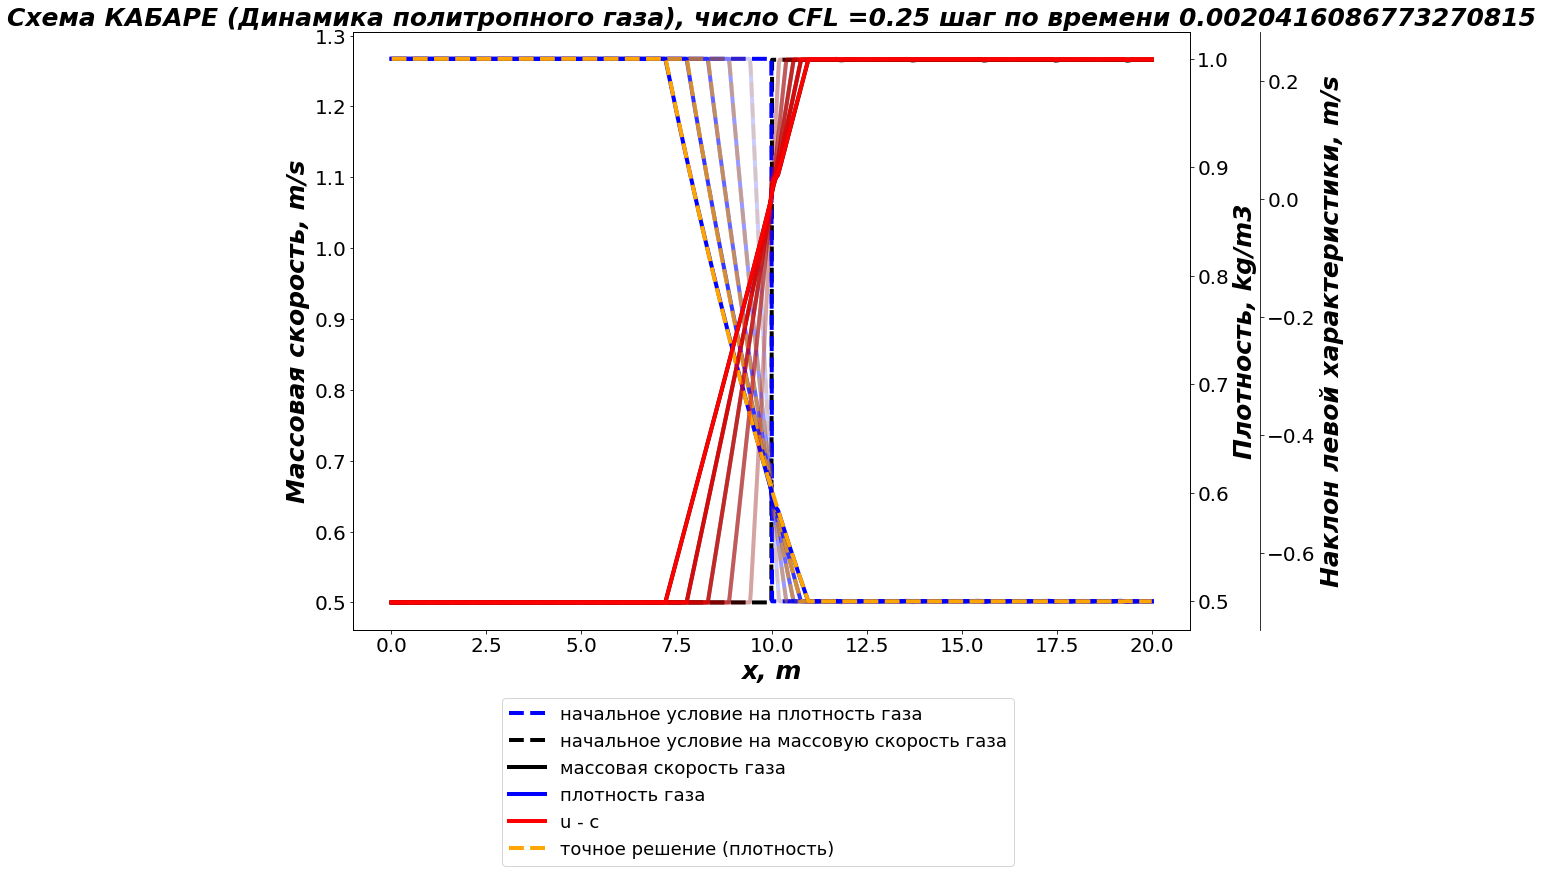

In [20]:
gamma = 1.4
a = 1.0

u_l = 0.5

rho_l = 1.0
rho_r = 0.5 

# условие для существования левой волны разрежения
u_r = u_l + 2*np.sqrt(a*gamma)/(gamma-1)*rho_l**((gamma-1)/2) - 2*np.sqrt(a*gamma)/(gamma-1)*rho_r**((gamma-1)/2) 


C = 0.25                                     # число CFL
delta_t = C*delta_x/(max(abs(u_l),abs(u_r))+np.sqrt(gamma)*max(rho_l,rho_r)**((gamma-1)/2))   # dt = c*dx/max(u)


#------------------------
# Расчет по явным схемам 
#------------------------

visualize_gas_dynamics(CABARET_Polytropic_gas,'КАБАРЕ (Динамика политропного газа)', x_cent, x_bound, 2001, delta_t, delta_x, u_l, u_r, rho_l, rho_r, gamma, a)

## Список литературы.

1. "Новые алгоритмы вычислительной гидродинамики для многопроцессорных вычислитлельных комплексов" *В.М. Головизнин, М.А. Зайцев, С.А. Карабасов, И.А. Короткин* ([МГУ ВМК](http://lim.cs.msu.ru/index.php?id=87), 2013)
2. "Дисперсионные и диссипативные характеристики разностных схем для уравнений в частных производных гиперболического типа" *В.М. Головизнин, А.В. Соловьев* ([МГУ ВМК](http://lim.cmc.msu.ru/index.php?id=9), 2018)
3. "Burgers equation" *Mikel Landjuela* BCAM Internship ([Basque center for applied mathematics(pdf)](http://www.bcamath.org/projects/NUMERIWAVES/Burgers_Equation_M_Landajuela.pdf), 2011)
4. "Numerical Methods for Conservation Laws" *Randall J. LeVeque* ([Springer](https://www.springer.com/gp/book/9783764327231), 1992)
5. "Riemann Solvers and Numerical Methods for Fluid Dynamics" *Eleuterio Toro* ([Springer](https://www.springer.com/gp/book/9783540252023), 2009)



---
**Ячейка снизу загружает стилевую конфигурацию блокнота.**

In [21]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()